In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import sklearn
import seaborn as sbr
import seaborn as sns
from sklearn.linear_model import LinearRegression

PART I

In [ ]:
df = pd.read_csv("/content/laptop_price.csv", encoding='latin-1')
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [ ]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:
#missing values
df.isna().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [ ]:
for column in df:
  print(column, df[column].nunique())

laptop_ID 1303
Company 19
Product 618
TypeName 6
Inches 18
ScreenResolution 40
Cpu 118
Ram 9
Memory 39
Gpu 110
OpSys 9
Weight 179
Price_euros 791


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
le = LabelEncoder()
X = df.apply(le.fit_transform)
X.drop("Price_euros", axis = 1)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,0,1,300,4,7,23,65,8,4,58,8,38
1,1,1,301,4,7,1,63,8,2,51,8,35
2,2,7,50,3,14,8,74,8,16,53,4,74
3,3,1,300,4,13,25,85,1,29,9,8,71
4,4,1,300,4,7,23,67,8,16,59,8,38
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,10,580,0,10,13,89,5,4,47,5,78
1299,1299,10,588,0,7,19,89,1,29,47,5,41
1300,1300,10,196,3,10,0,34,3,35,40,5,56
1301,1301,7,2,3,14,0,89,7,10,21,5,104


In [ ]:
y = df["Price_euros"]
y

0       1339.69
1        898.94
2        575.00
3       2537.45
4       1803.60
         ...   
1298     638.00
1299    1499.00
1300     229.00
1301     764.00
1302     369.00
Name: Price_euros, Length: 1303, dtype: float64

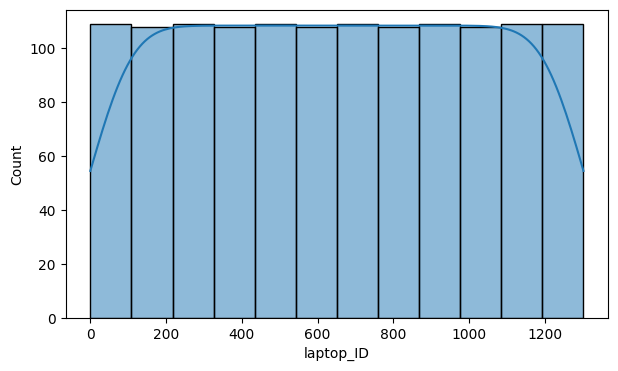

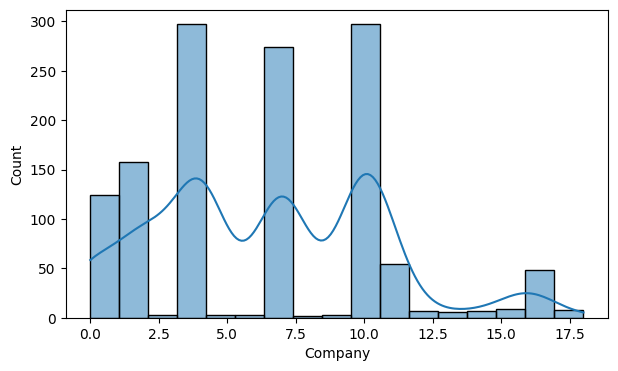

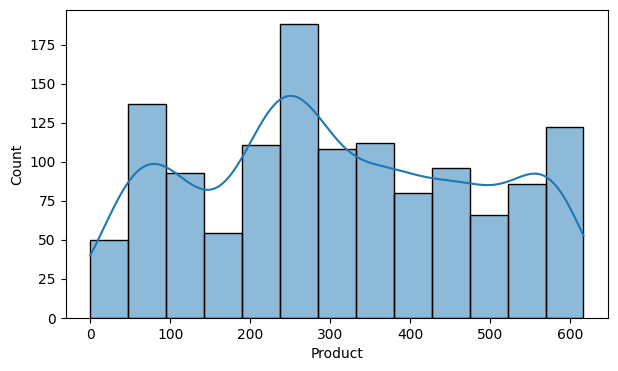

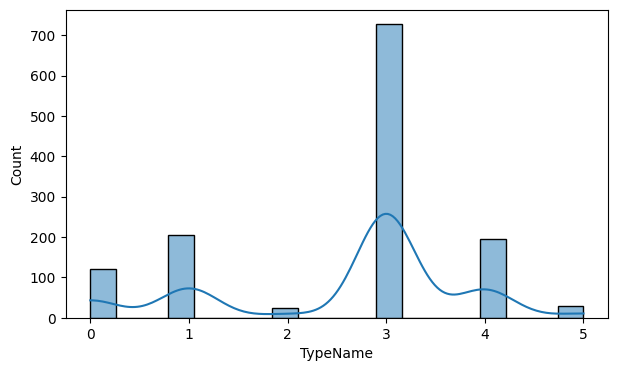

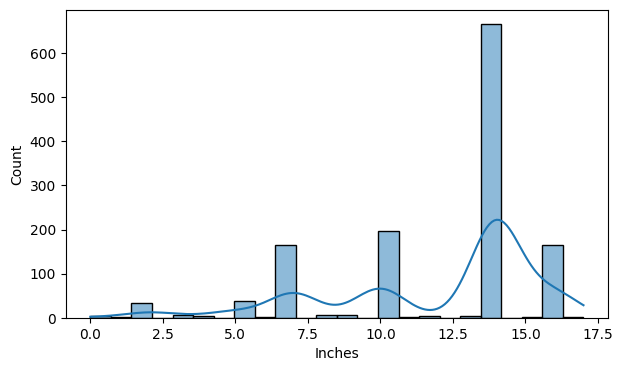

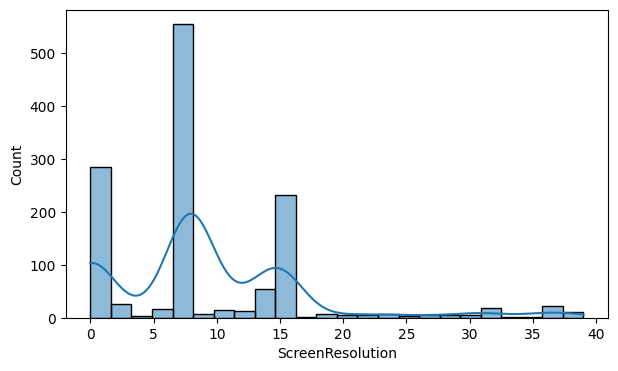

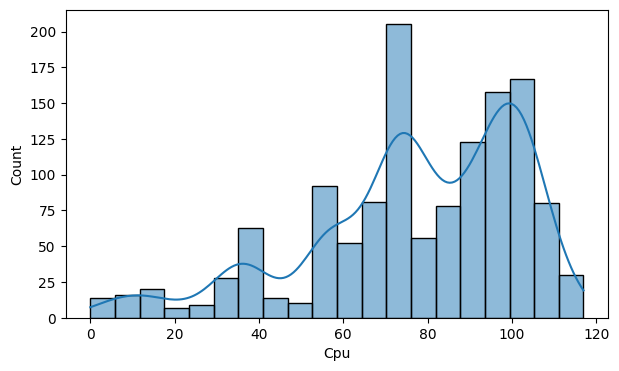

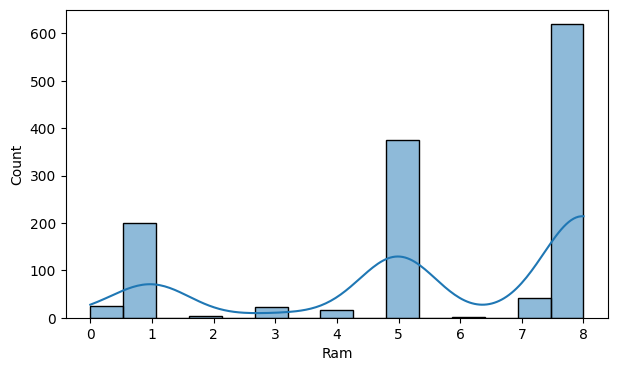

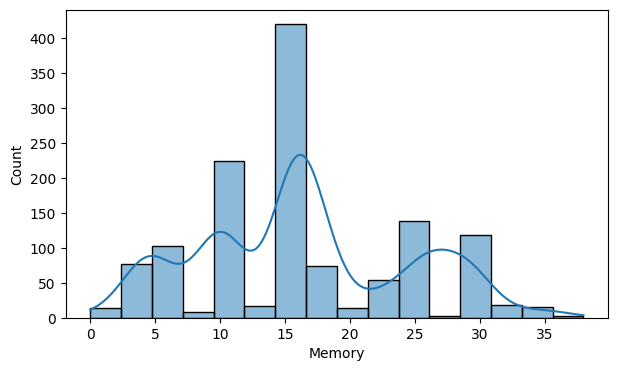

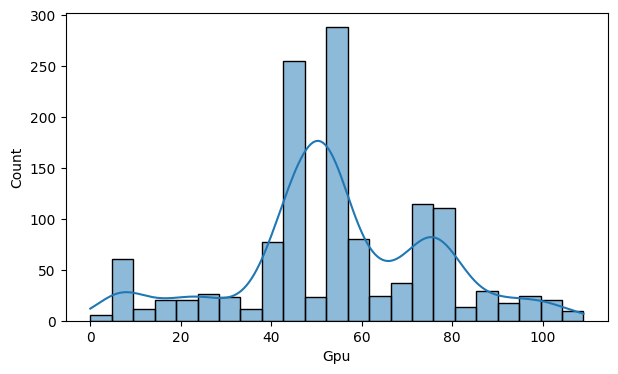

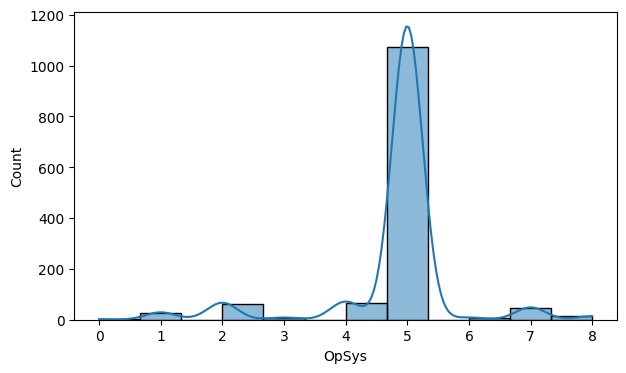

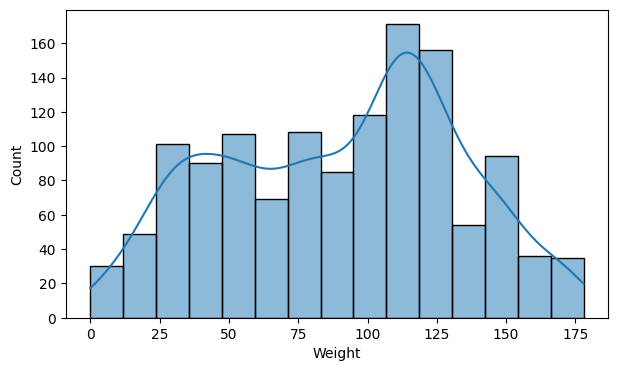

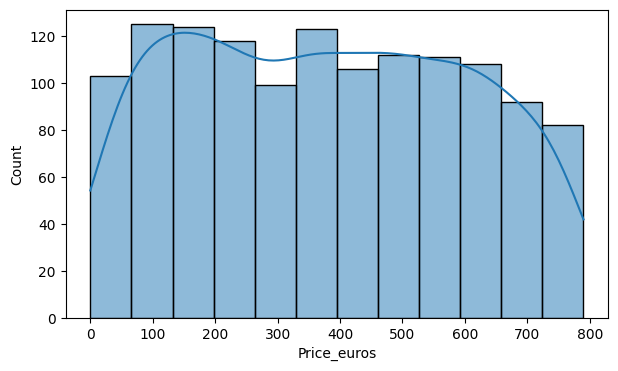

In [ ]:
for i in X.columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=X, x=i, kde = True)
    plt.show()

In [ ]:
y.shape

(1303,)

PART II

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
LinReg = LinearRegression()
LinReg.fit(X, y)

LinearRegression()

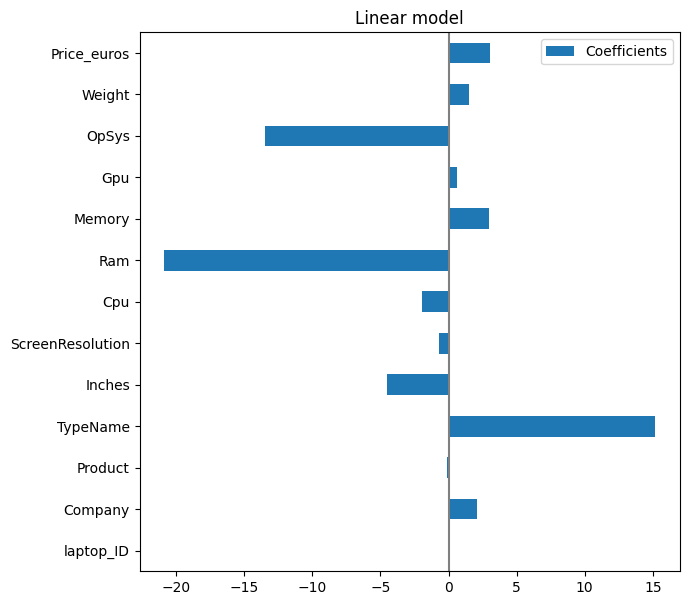

In [ ]:
coefs = pd.DataFrame(LinReg.coef_, index=X.columns, columns=["Coefficients"])

coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Linear model")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

наиболее информативные признаки: Ram, OpSys

In [ ]:
# оценка значимости регрессии
# метрика - коэфф. детерминации R^2
pred = LinReg.predict(X)
print("R2 {}".format((r2_score(pred, y))))

R2 0.8614752834898018


PART III

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}
GradBoost = GradientBoostingRegressor(**params)
GradBoost.fit(X, y)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=500)

In [ ]:
pred = GradBoost.predict(X)
print("R2 {}".format((r2_score(pred, y))))

R2 0.9999488943678772


In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [ ]:
scores_linreg = cross_validate(LinReg, X, y, cv=3, scoring=('neg_root_mean_squared_error'), return_train_score=True)
scores_gradboost = cross_validate(GradBoost, X, y, cv=3, scoring=('neg_root_mean_squared_error'), return_train_score=True)
print("lin reg RMSE =", -scores_linreg["train_score"].mean())
print("grad boost RMSE =", -scores_gradboost["train_score"].mean())

lin reg RMSE = 242.01172582681252
grad boost RMSE = 4.922412033350342


PART IV

In [ ]:
x = X["Ram"].to_frame()
y = df["Price_euros"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
model_1 = LinearRegression()
model_1.fit(X_train, y_train)
pred_1 = model_1.predict(X_test)

model_2 = GradientBoostingRegressor()
model_2.fit(X_train, y_train)
pred_2 = model_2.predict(X_test)

plt.scatter(X_test, y_test, color="black", alpha=0.25)
plt.plot(X_test, pred_2, color="red", linewidth=1)
plt.plot(X_test, pred_1, color="blue", linewidth=2)
plt.xlabel(column)
plt.ylabel('Price')
plt.show()

In [ ]:
X = X[["Ram", "OpSys", "TypeName", "Inches"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
for column in X:
  model_1 = LinearRegression()
  model_1.fit(X_train[column].to_frame(), y_train)
  pred_1 = model_1.predict(X_test[column].to_frame())

  model_2 = GradientBoostingRegressor()
  model_2.fit(X_train[column].to_frame(), y_train)
  pred_2 = model_2.predict(X_test[column].to_frame())

  plt.scatter(X_test[column].to_frame(), y_test, color="black", alpha=0.25)
  plt.plot(X_test[column].to_frame(), pred_2, color="red", linewidth=1)
  plt.plot(X_test[column].to_frame(), pred_1, color="blue", linewidth=2)
  plt.xlabel(column)
  plt.ylabel('Price')
  plt.show()